# VA Opdracht 2

Vul je naam in en die van je groepsgenoot: Jeroen Oudshoorn en Steijn Tekke

## Deadline

De deadline voor deze opdracht is woensdag 10:00.

## Palmer Archipelago (Antarctica) penguin

We maken gebruik van de dataset `Palmer Archipelago (Antarctica) penguin`. Download de `penguins_size` CSV bestand van Brightspace en plaats het in dezelfde folder waarin je werkt. Deze dataset laden we in via pandas. Zoals in opdracht 1 gebruiken we functies `head`, `info` en `describe` om de data te inspecteren. De data bevat de volgende informatie:
* species: pinguïnsoorten (Chinstrap, Adélie of Gentoo)
* culmen_length_mm: lengte bovenste rand van een snavel (mm)
* culmen_depth_mm: snavel hoogte (mm)
* flipper_length_mm: vleugel lengte (mm)
* body_mass_g: lichaamsmassa (g)
* island: eilandnaam (Dream, Torgersen of Biscoe) in de Palmer Archipelago (Antarctica)
* sex: geslacht van de pinguins

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('penguins_size.csv')

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.value_counts('island')

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

# Intro - gebruik ChatGPT

Bij het maken van deze opdracht kan je ChatGPT zeker gebruiken. Bij het gebruik van ChatGPT is het gebruik van goeie prompts erg belangrijk. Verder moet je soms ook een beetje in de documentatie kijken van de packages zelf om erachter te komen welke prompts je hiervoor nodig hebt. Of dit vraag je aan ChatGPT. Bijvoorbeeld: je wilt een bepaald kleurenschema, maar je weet niet precies hoe je dit moet gebruiken. Je kan aan ChatGPT vragen welke variabele bijvoorbeeld de distplot gebruikt om tot een kleurenschema te komen. Mocht je hier nu foutmeldingen krijgen, dan is je tweede check de documentatie van Plotly / Seaborn. Hier staan vaak voorbeelden in, waarin je misschien verschillen kan zien.

Aangezien we gebruik kunnen maken van ChatGPT verandert de rol als programmeur van puur programmeren naar meer debuggen. Dit is dus belangrijk om goed te kunnen. Een begrip van hoe je plotjes maakt is daarbij belangrijk. Datacamp helpt hier goed bij. De opdracht wordt uiteraard strenger beoordeeld nu we gebruik van ChatGPT kunnen maken. 

# Deel 1 - Seaborn
## Onderdeel 1
Laten we eerst een aantal boxplots maken van het gewicht en eiland. We maken de opdrachten deze week eerst in `seaborn` en na dit onderdeel in `plotly`. 

* Zet de boxplots in horizontale richting. (het eiland komt op de y-as, gewicht op de x-as)
* Geef de visualusatie geschikte titels en labels. Zie: https://www.delftstack.com/howto/seaborn/set-axis-labels-seaborn-python/ voor de labels
* Verander de volgorde van de boxplots. Van boven naar beneden: Torgersen, Biscoe, Dream



C:\Users\jeroe\AppData\Local\Temp\ipykernel_16460\2047999162.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(medians[tick], pos[tick]-0.3, medians[tick],


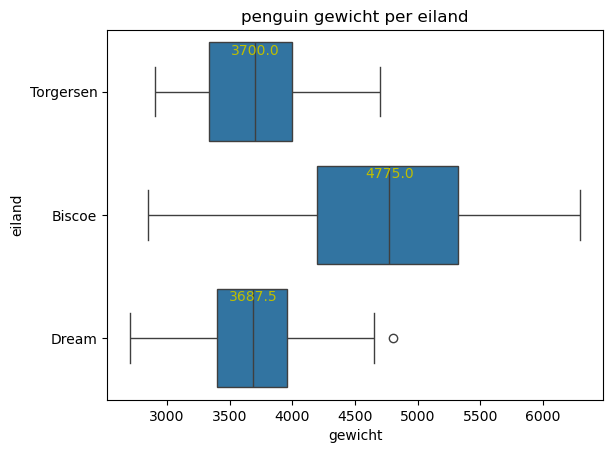

In [6]:
 import seaborn as sns
 import matplotlib.pyplot as plt

 ax = sns.boxplot(data= df, x= "body_mass_g", y= "island")
 plt.title("penguin gewicht per eiland")
 plt.xlabel("gewicht")
 plt.ylabel("eiland")
 desired_order = ["Torgersen", "Biscoe", "Dream"]
 medians = df.groupby("island")["body_mass_g"].median().reindex(desired_order)

 pos = range(len(medians))

 for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(medians[tick], pos[tick]-0.3, medians[tick], 
            horizontalalignment='center', color="y", weight="normal")
 plt.show()


Voeg nu de volgende onderdelen toe aan je vorige plot:
* Zet de boxplots verder van elkaar.
* Geef de boxplots een andere kleur dan de standaardkleur.
* Vermeld boven het gemiddelde in de boxplots de waarde van de het gemiddelde.

In [7]:
#selecteren medians
desired_order = ["Torgersen", "Biscoe", "Dream"]
medians = df.groupby("island")["body_mass_g"].median().reindex(desired_order)

pos = range(len(medians))

for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(medians[tick], pos[tick]-0.3, medians[tick], 
        horizontalalignment='center', color="y", weight="normal")

C:\Users\jeroe\AppData\Local\Temp\ipykernel_16460\2119808343.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(medians[tick], pos[tick]-0.3, medians[tick],


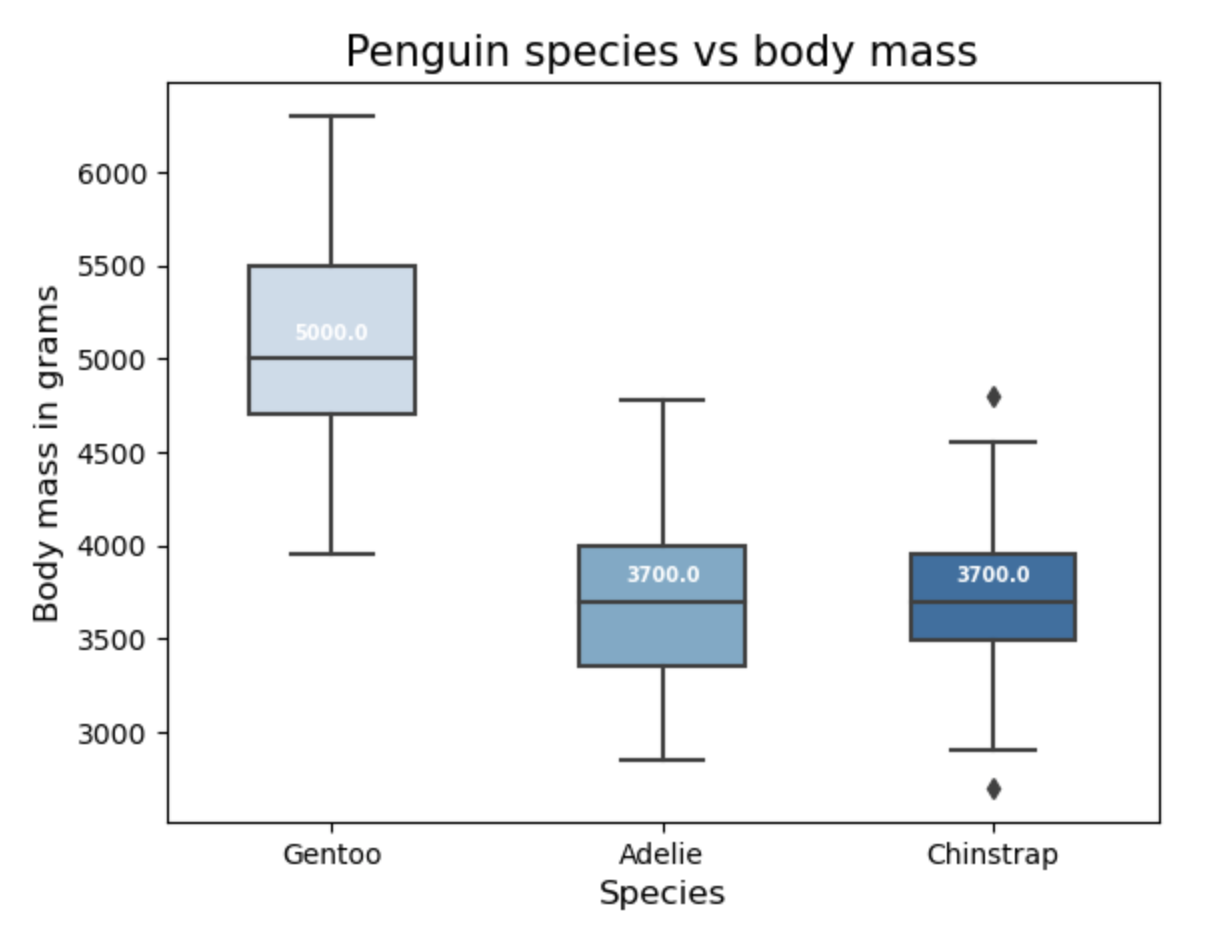

In [9]:
from IPython import display
display.Image("Inleveropdracht2_Onderdeel1.png")

## Onderdeel 2

Maak een scatterplot van de data met op de x-as de lengte van de snavel en op y-as de hoogte van de snavel.
* Zorg dat alle verschillende eilanden een eigen kleur hebben. Gebruik palette `Set1`
* Geef de visualisatie geschikte titels en labels
* Geef de titel een rode kleur.


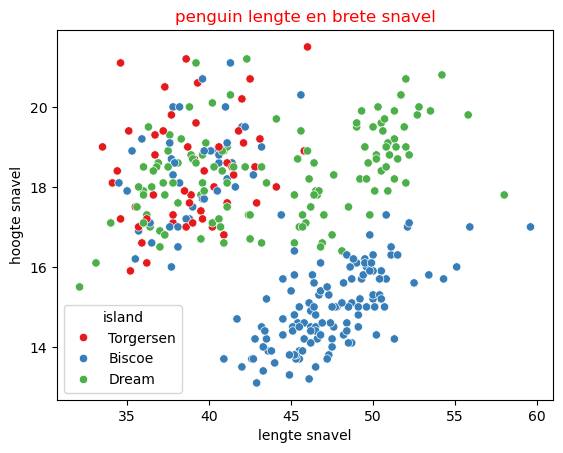

In [8]:
sns.set_palette("Set1")
ax = sns.scatterplot(data=df, x= "culmen_length_mm", y= "culmen_depth_mm", hue= "island")
plt.title("penguin lengte en brete snavel", color='red')
plt.xlabel("lengte snavel")
plt.ylabel("hoogte snavel")
plt.show()

We zijn nu benieuwd naar de relatie tussen het gewicht en de vleugelgrootte per pinguinsoort. Maak een spreidingsdiagram van de twee variabelen. 
* Zorg ervoor dat de visualisatie er net zo uit ziet als de onderstaande afbeelding. 
* tip: je hebt een andere functie nodig dan `sns.scatterplot`

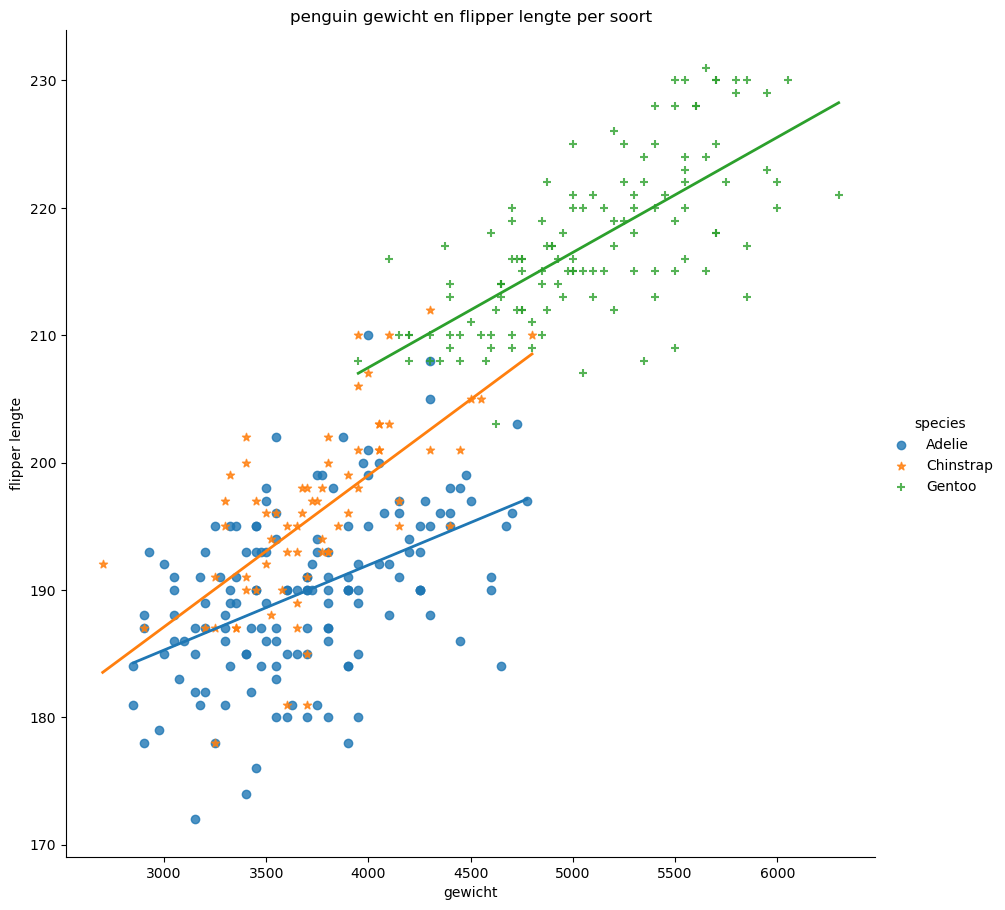

AttributeError: 'function' object has no attribute 'Image'

In [10]:

sns.reset_orig()
sns.lmplot(
    data=df,
    x="body_mass_g",
    y="flipper_length_mm",
    hue="species",  
    markers=["o", "*", "+"],
    line_kws={"linewidth": 2},  
    ci= None,
    height=9, 
    aspect=1  
)


plt.title("penguin gewicht en flipper lengte per soort")
plt.xlabel("gewicht")
plt.ylabel("flipper lengte")
plt.show()


display.Image("Inleveropdracht2_Onderdeel2.png")

# Deel 2 - Plotly
## Onderdeel 3a

Laten we eerst een aantal boxplots maken van het gewicht en pinguïnsoort. Zoals alle verdere opdrachten maken we de volgende visualisaties met `plotly`.

* Zet de boxplots in verticale richting. (het pinguïnsoort komt op de x-as)
* Geef de visualusatie geschikte titels. (boven, en x- en y-assen)
* Geef alle verschillende soorten een andere kleur. Gebruik hiervoor een andere kleurenverdeling dan de standaard.
* Verander de volgorde van de boxplots. Van links naar rechts: Gentoo, Adelie, Chinstrap.

In [11]:
import plotly.express as px

# Wanneer je een error krijgt, installeer dan plotly, zie https://plotly.com/python/getting-started/

In [12]:
fig = px.box(data_frame= df, x= "species", y="body_mass_g", color= "species",
                 color_discrete_map={
        "Adelie": "yellow",
        "Gentoo": "purple",
        "Chinstrap": "pink"},
        category_orders={
        "species": ["Gentoo", "Adelie", "Chinstrap"]
        }
        )

fig.update_layout(
    title="Lichaamsgewicht per Pinguïnsoort",
    xaxis_title="Pinguïnsoort",
    yaxis_title="Lichaamsgewicht (gram)"
)
fig.show()

Beantwoord op basis van de laatst gemaakte visualisatie.

* Welke uitspraak kan je maken met betrekking tot de lichaamsmassa en het pinguïnsoort?

#### Antwoord:



de penguins van het soort gentoo hebben een hoger lichaamsgewicht dan de andere 2 soorten en adelie en chinstrap hebben ongeveer het zelfde gewicht maar chinstrap heeft een iets smallere verdeling

## Onderdeel 3b

Voordat we aan de slag gaan met de distplot gaan we een histogram maken van de lengte van de vleugels (`flipper_length_mm`) van de drie pinguïnsoorten. We willen het volgende plaatje zien alleen met andere kleuren:

Zit je in klas 1:
* Gebruik de kleuren van het kleurenschema Set3

Zit je in klas 2:
* Gebruik de kleuren van het kleurenschema Pastel

Zit je in klas 3:
* Gebruik de kleuren van het kleurenschema Vivid

Zit je in klas 4:
* Gebruik de kleuren van het kleurenschema Antique


In [13]:
fig = px.histogram(data_frame= df, x="flipper_length_mm", color= "species", color_discrete_sequence=px.colors.qualitative.Set3)
fig.update_layout(
    title="penguin flipper lengte",
    xaxis_title="flipper lengte",
    yaxis_title="aantal"
)
fig.show()

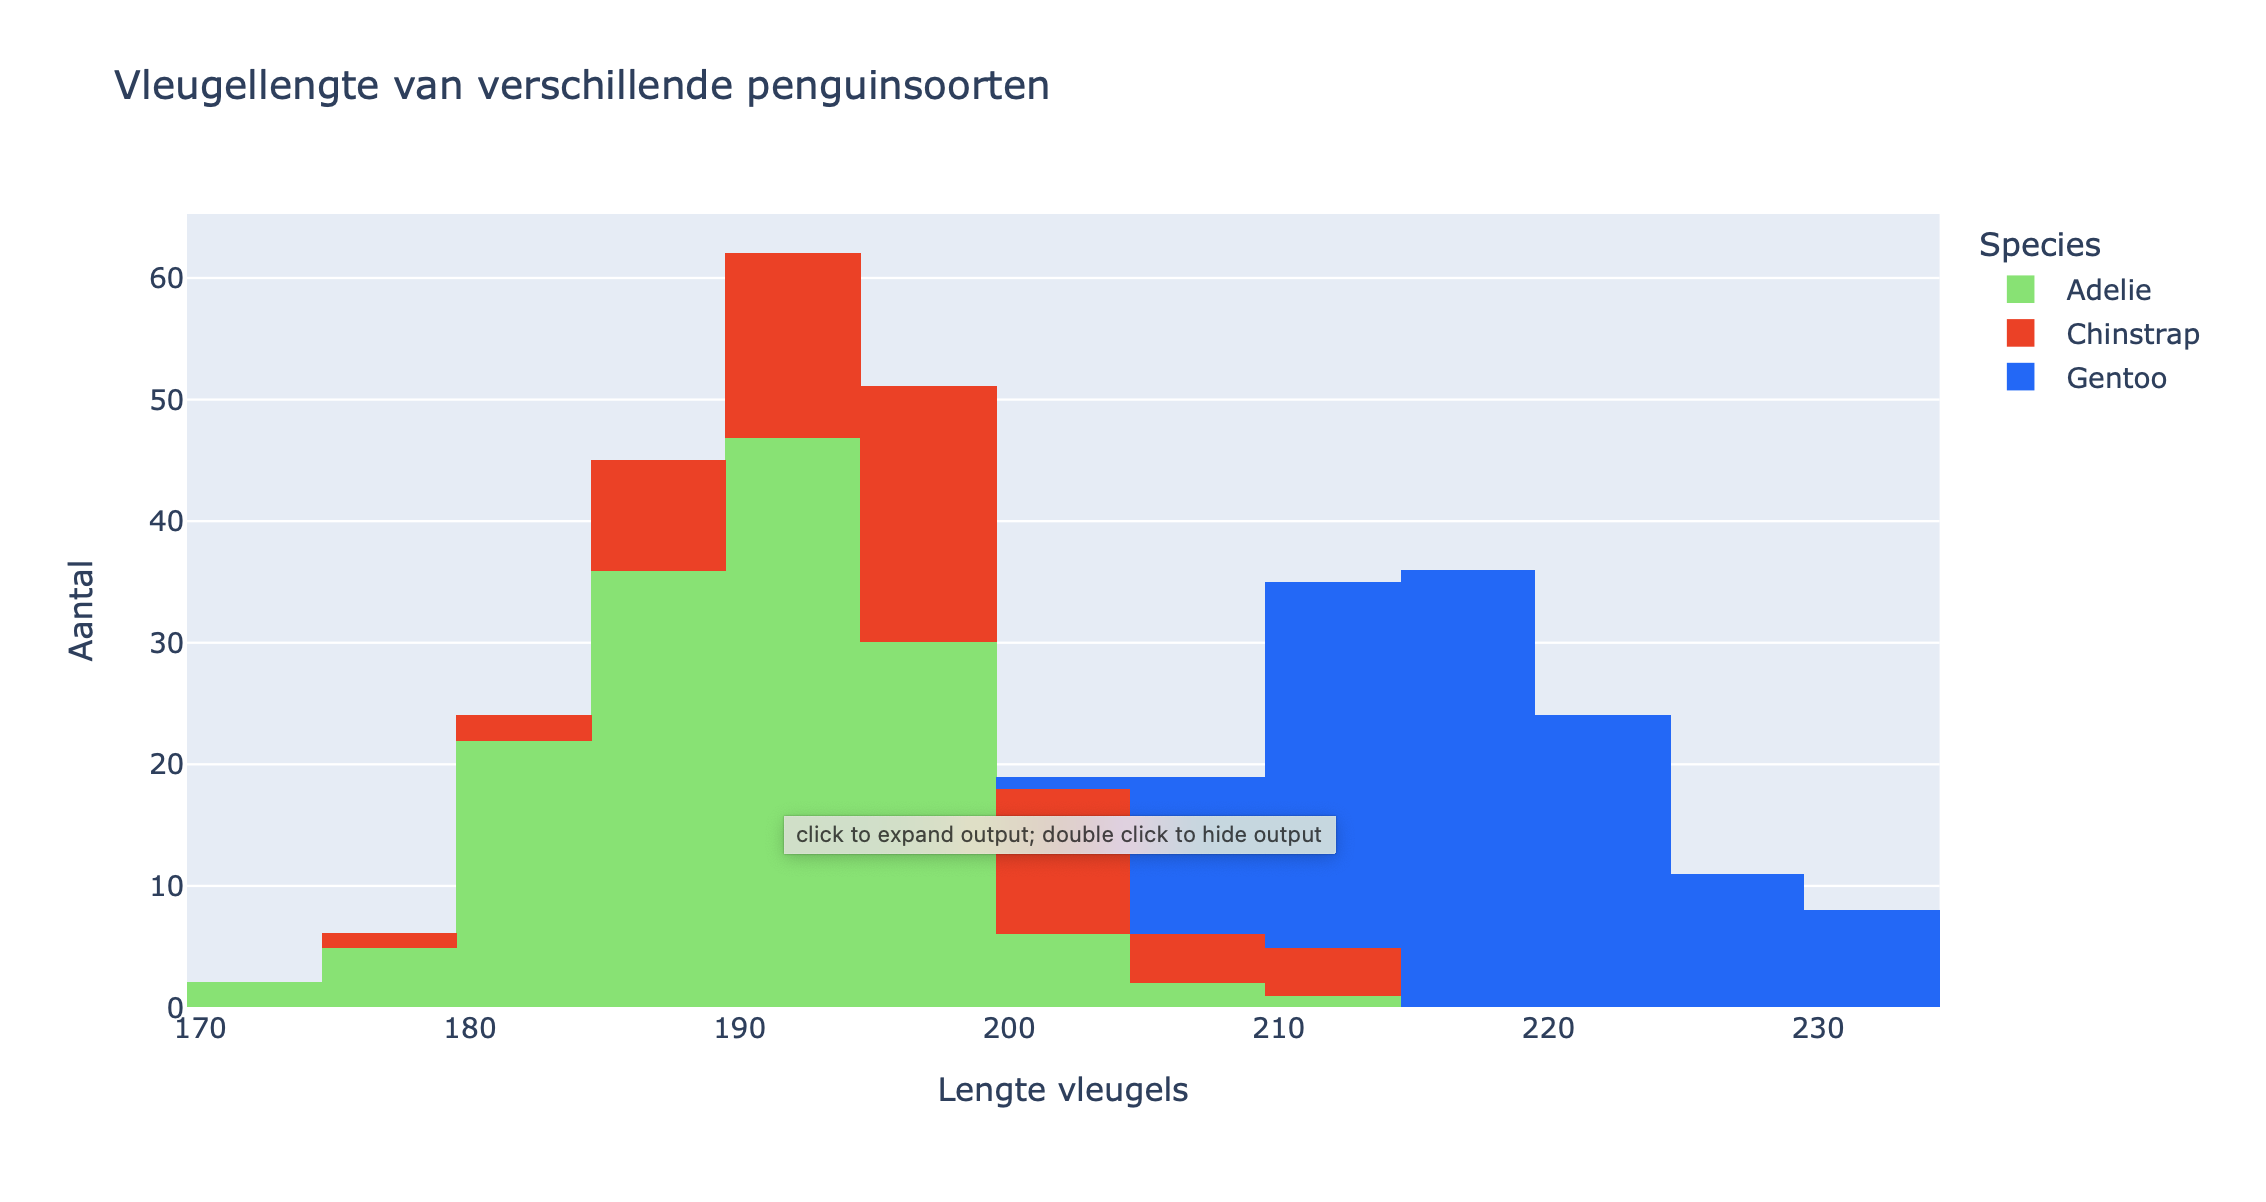

In [14]:
from IPython import display
display.Image("Inleveropdracht-onderdeel-3.png")

# Onderdeel 3c
Maak nu dezelde visualisatie als in onderdeel 3b alleen gebruik in plaats van een histogram een dichtheidsfunctie.

In [15]:
import plotly.figure_factory as ff
df = df.dropna()

Adelie = df[df['species']=='Adelie']['flipper_length_mm'].tolist()
Chinstrap = df[df['species']=='Chinstrap']['flipper_length_mm'].tolist()
Gentoo = df[df['species']=='Gentoo']['flipper_length_mm'].tolist()

hist_data = [Adelie, Chinstrap, Gentoo]
group_labels = ['Adelie', 'Chinstrap', 'Gentoo']

fig = ff.create_distplot(hist_data, group_labels,
                         colors=px.colors.qualitative.Set3[:3], 
                         show_hist=False)

fig.update_layout(title='Vleugellengte van verschillende penguinsoorten',
                  xaxis_title='Lengte vleugels')

## Onderdeel 4

Deze vragen gaan over de dichtheidsfunctie gemaakt in onderdeel 3. Geef antwoord op de volgende vragen op basis van de gemaakte visualisatie.

* Wat voor verdeling is dit?
Het is een dichtheidsverdeling. deze laat zien waar de waarde het meest voorkomen.
* Wat is een dichtheidsfunctie?
Een dichtheidsfunctie geeft de relatieve dichtheid van de waarde op verschillende punten weer. hoe hoger de lijn hoe meer waarnemingen zich daar bevinden.
* Noem tenminste twee voordelen en een nadeel van een Kernel density estimation (KDE).
voordelen:
- Vloeiend en continu waardoor hij makkelijker te interpreteren is.
- Makkelijk te vergelijken tussen verschillende groepen.
Nadelen:
- Bij een kleine dataset kan hij geen betrouwbare verdeling maken. De curve kan dan makkelijke pieken en dalen en is heel beinvloedbaar.

#### Antwoord:

## Onderdeel 5

We gaan kijken of de snavelkarakteristieken verschillend zijn per pinguïnsoort en/of eiland. Hiervoor maken we een spreidingsdiagram. Om dit te maken, gebruiken we de `relplot` functie van seaborn.

* Zet de variabelen lengte en hoogte van de snavel respectievelijk op de x- en y-as.

* Geef elk eiland een eigen vorm. (denk aan rondjes, sterretjes en plusjes)
* Maak de grafiek groter.
* Geef de visualusatie geschikte titels. (boven, en x- en y-assen)



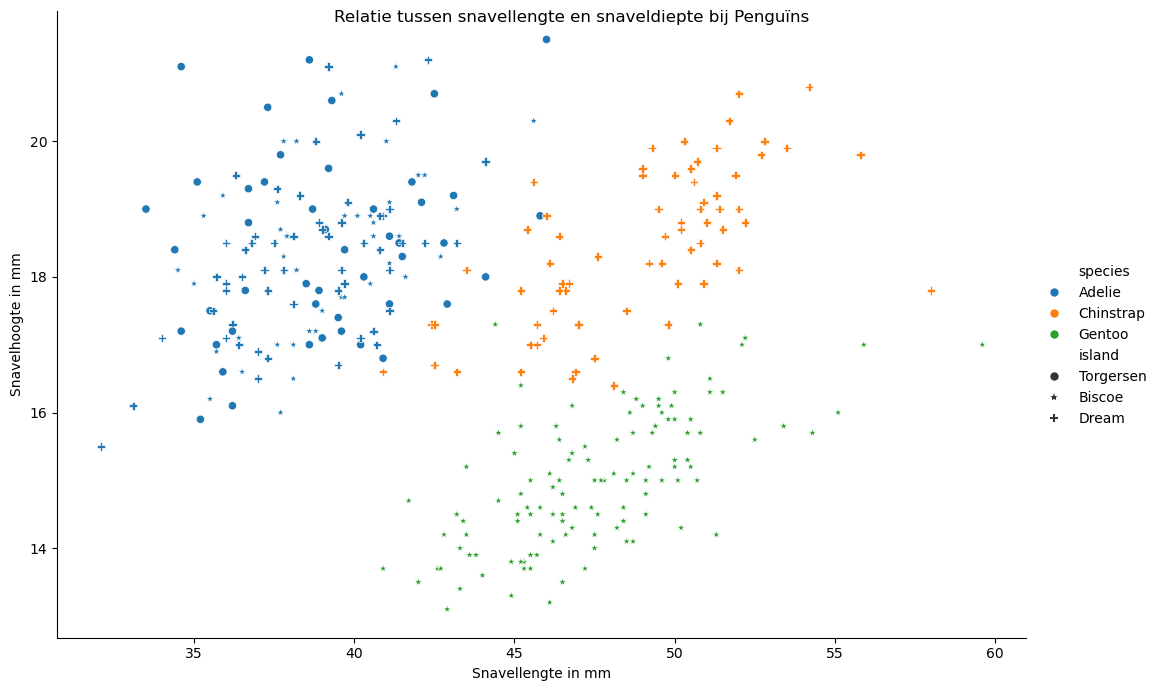

In [17]:
ax = sns.relplot(data=df, x='culmen_length_mm', y='culmen_depth_mm',
                  hue='species', style='island',
                  markers=['o', '*', 'P'],
                  height=7,
                  aspect=1.5)
ax.fig.suptitle('Relatie tussen snavellengte en snaveldiepte bij Penguïns')
ax.set_xlabels('Snavellengte in mm')
ax.set_ylabels('Snavelhoogte in mm')



plt.show()


Beantwoord op basis van de laatst gemaakte visualisatie.

* Wat is de relatie tussen de snavelkarakteristieken (lengte en hoogte) en de pinguïnsoorten?
Elke soort heeft zn eigen karakteristieken. Zo heeft de Gentoo een kleine lange snavel, de Chinstrap de grootste en langste snavel terwijl de Adelie een korte diepe snavel heeft.
* Wat valt je op als je kijkt naar type eiland en pinguïnsoort?
Het valt op dat de Chinstrap en Gentoo maar op 1 eiland leven, terwijl de Adelie op meerdere eilanden voorkomt.

#### Antwoord:




## Onderdeel 6

We gaan hier op een andere manier een figuur maken. Namelijk met de `graphic_objects` module van plotly. We maken een scatter plot, waarbij we snavel lengte op de y-as en snavel hoogte op x-as zetten.

* Maak een lijst met de drie verschillende soorten.
* Maak een loop, waarbij elke keer voor een andere soort een nieuwe trace met een scatter plot wordt toegevoegd.
* Zorg dat de assen en titels weer geschikt zijn.
* Gebruik dezelfde kleuren als uit onderdeel 3 (maak je eigen color map)

In [18]:
import plotly.graph_objects as go
fig = go.Figure()


species = ["Adelie","Gentoo","Chinstrap"]
set3_colors = px.colors.qualitative.Set3
color_map = dict(zip(species, set3_colors)) 
### code
# Loop through the species
for specie in species:
        species_data = df[df["species"] == specie]
        fig.add_trace(go.Scatter(
        x=species_data["culmen_length_mm"],
        y=species_data["culmen_depth_mm"],
        mode='markers',
        marker=dict(color=color_map[specie]),
        name=specie 
        ))

fig.update_layout({'title': {'text':'penguin snavel lengte en hoogte per soort'},
                    'xaxis': {'title':{'text': 'snavel lengte'}},
                    'yaxis': {'title':{'text': 'snavel hoogte'}}})
fig.show()

## Onderdeel 7

We zijn nu benieuwd naar de relatie tussen het gewicht en de vleugelgrootte per pinguinsoort. Maak een spreidingsdiagram van de twee variabelen. Dit kan met de plotly.express module `scatter_matrix`. Voldoe aan de volgende eisen.

* Geef elk soort een eigen kleur en markeervorm. (denk aan rondjes, sterretjes en plusjes)
* Zet `height` parameter op geschikte `int`, zodat de hoogte ongeveer 2 keer zo veel is als de `default`.
* Geef de visualusatie geschikte titels. (boven, en x- en y-assen)

Zit je in klas 1:
* Voeg een annotatie zonder pijl toe met de huidige datum en tijd boven aan de figuur. Gebruik hiervoor y: 1.05, en x: 0.5 

Zit je in klas 2:
* Voeg een annotatie met pijl toe aan de grafiek linksboven om het maximum aan te geven met (evt. handmatig aangegeven) hoeveel de waarde is van het maximum

Zit je in klas 3:
* Voeg een annotatie zonder pijl toe met de mediane waardes van het gewicht van elke soort onder aan de figuur met gewicht.  

Zit je in klas 4:
* Voeg een cirkel toe waarbij je de Gentoo waardes omcirkelt in de rechterbovenste grafiek.



In [19]:
from datetime import datetime

fig = px.scatter_matrix(data_frame= df,
                        dimensions=["body_mass_g", "flipper_length_mm"], 
                        color="species",
                        symbol="species"
                        )

fig.update_layout(height=1200)
# Add an annotation and show
timestamp = datetime.now()
fig.update_layout(
    xaxis_title="Snavellengte (mm)", 
    yaxis_title="Snaveldiepte (mm)" 
)
fig.update_layout(title="Snavel- en lichaamsmetingen per soort")
# Voeg de huidige datum en tijd toe
timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

fig.add_annotation(
    text=f"Gegenereerd op {timestamp}",
    xref="paper", 
    yref="paper",
    x=0.5, 
    y=1.05,   
    showarrow=False,
    font=dict(size=12, color="gray")
)

fig.show()

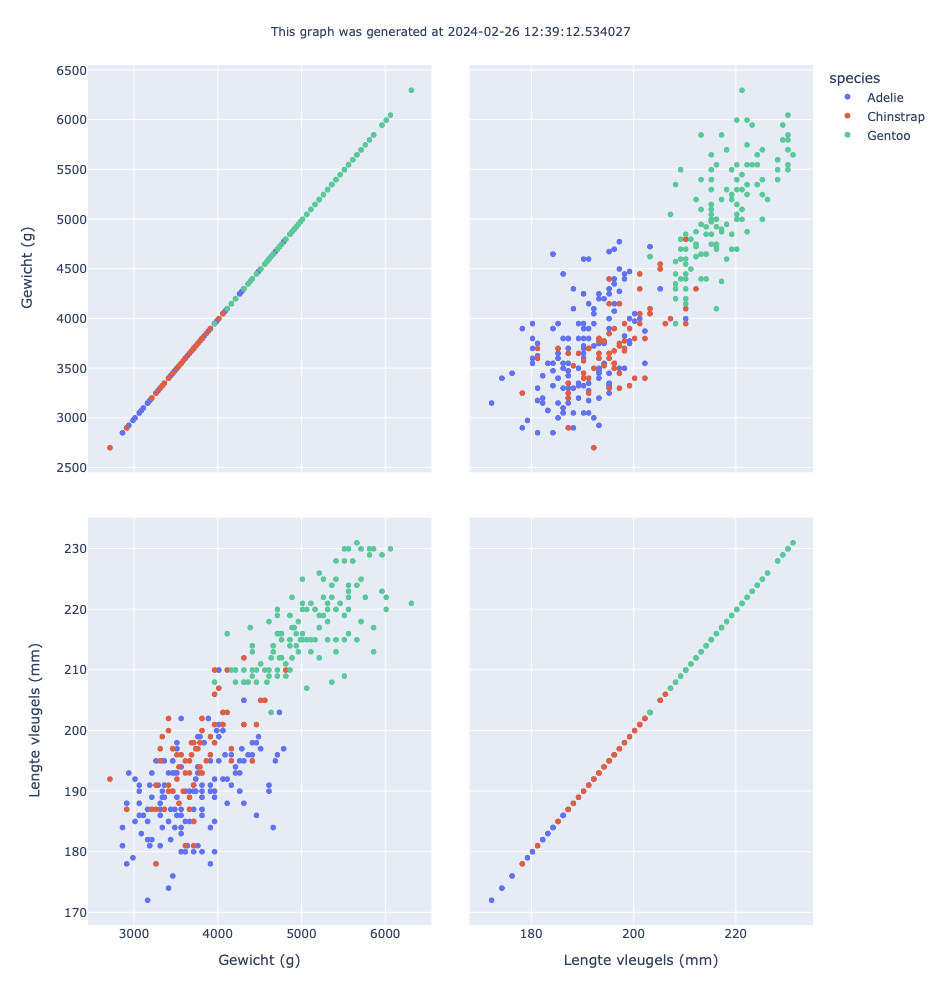

In [19]:
display.Image("Inleveropdracht2_Onderdeel7.png")

## Onderdeel 8

We gaan nu dezelfde relatie tussen het gewicht en de vleugelgrootte per pinguinsoort nog eens bekijken. We gaan nu ook een regressielijn in de figuur laten zien. Dit doen we met het `trendline` argument. 

* Maak een scatter plot met gewicht op de x-as en vleugel lengte op de y-as.
* Maak een 'ols' regressielijn voor elke soort met het `trendline` argument.
* Maak een histogram boven de x-as en naast de y-as met de `marginal_x` en `marginal_y` argumenten.
* Geef beide assen en de figuur een geschikte titel en zorg dat de legenda ook een geschikt label heeft.
* Maak de grafiek een stuk groter

* Zorg dat elke soort een eigen kleur heeft. Gebruik hiervoor weer dezelfde kleuren:

Zit je in klas 1:
* Gebruik de kleuren van het kleurenschema Set3

Zit je in klas 2:
* Gebruik de kleuren van het kleurenschema Pastel

Zit je in klas 3:
* Gebruik de kleuren van het kleurenschema Vivid

In [21]:
fig = px.scatter(df, y='flipper_length_mm', x='body_mass_g', color='species',
                 labels={'flipper_length_mm':'Vleugel lengte (mm)', 'body_mass_g':'Gewicht (g)','species':'Soort'},
                 trendline='ols',
                 marginal_x='histogram', marginal_y='histogram',
                 title='Regressie per soort op basis van vleugellengte en gewicht',
                 width=1000,
                 height=1000)
fig.update_layout()
fig.show()



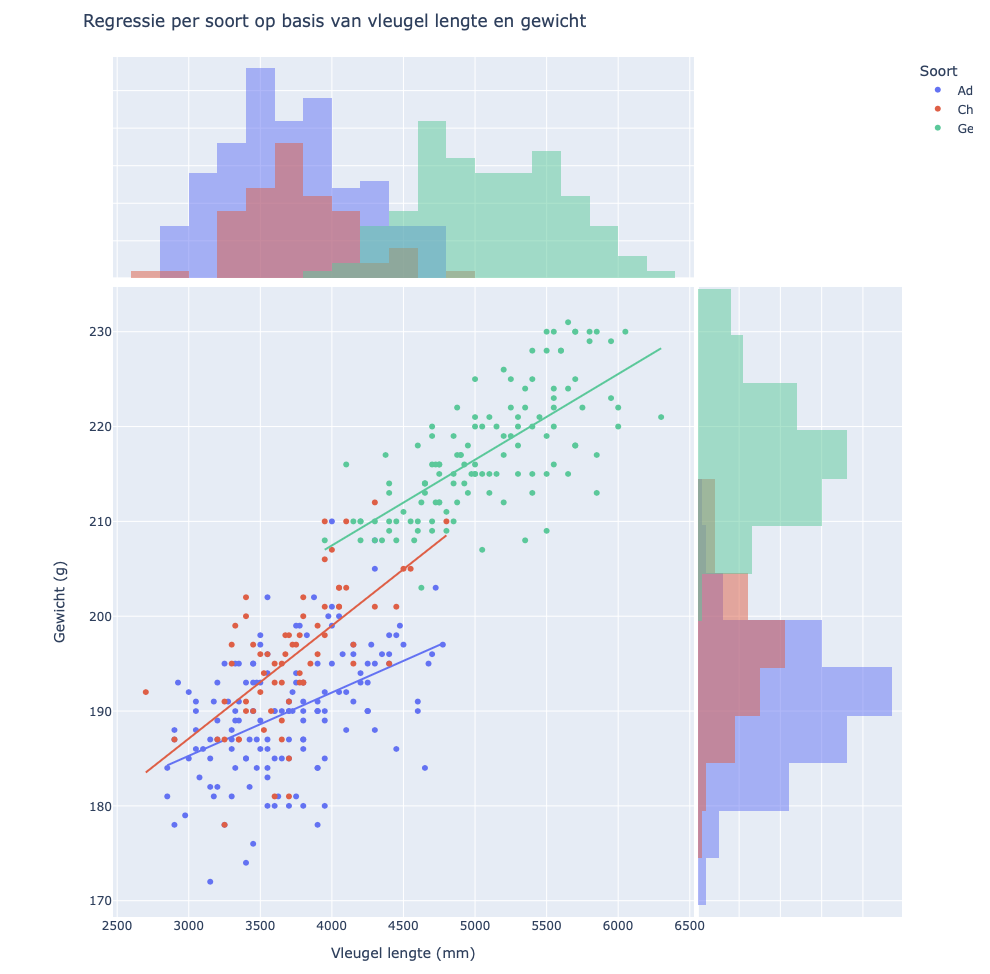

In [21]:
display.Image("Inleveropdracht2_Onderdeel8.png")

Beantwoord op basis van de laatst gemaakte visualisatie.

* Wat is de voorspelde vleugelgrootte bij een gewicht van 4500 gram van de soort Gentoo? 
211
* welk regressielijn heeft het grootste richtingcoefficient?
de richtingscoeficient van chinstrap is het grootst omdat die het snelst stijgt namelijk met 0.0119 per gram. de andere soorten hebben 0.0066 en 0.0093.

#### Antwoord:




## Onderdeel 9

We gaan nu een dichtheidsfunctie maken van de lengte van de vleugels (`flipper_length_mm`) van de drie pinguïnsoorten. Hiervoor gebruiken we de displot functie van plotly. 

* Mocht je hier ergens een foutmelding krijgen, zorg eerst dat je de dataframe filtert op Nan values
* Om een dichtheidsfunctie te maken moeten we aan de slag met de plotly.figure_factory package. Importeer deze package. Kijk hier verder voor meer informatie: https://plotly.com/python/distplot/
* We moeten de data eerst herschrijven om met deze package aan de slag te gaan. Dat is soms de harde waarheid van mooie visualisaties maken. Veel voorwerk... Kijk bij de voorbeelden in de link voor meer info: https://plotly.com/python/distplot/ (Het is ook mogelijk om het met de pandas DataFrame te doen, maar dat is wat moeilijker.)


* Maak van elke soort een list of DataFrame Series met de lengte van de vleugels
* Maak een nieuwe variabele met de namen van de labels
* Maak de figuur van de distplot met een passende titel en label op de x-as

Zit je in klas 1: 
* gebruik deze kleuren (colors = ['#835AF1', '#7FA6EE', '#B8F7D4']) en zorg dat de dichtheidsfunctie lijnen niet zichtbaar zijn.

Zit je in klas 2: 
* Gebruik dezelfde kleuren als in voorgaande plots en gebruik de volgende bin groottes ([0.1, 0.2, 0.3])

Zit je in klas 3:
* Maak een cirkel in de grafiek waarmee je de bars tussen 200 mm en 210 mm omcirkelt (het overlappingspunt van de drie penguinsoorten).

Zit je in klas 4:
* Gebruik dezelfde kleuren als in het kleurenschema Vivid

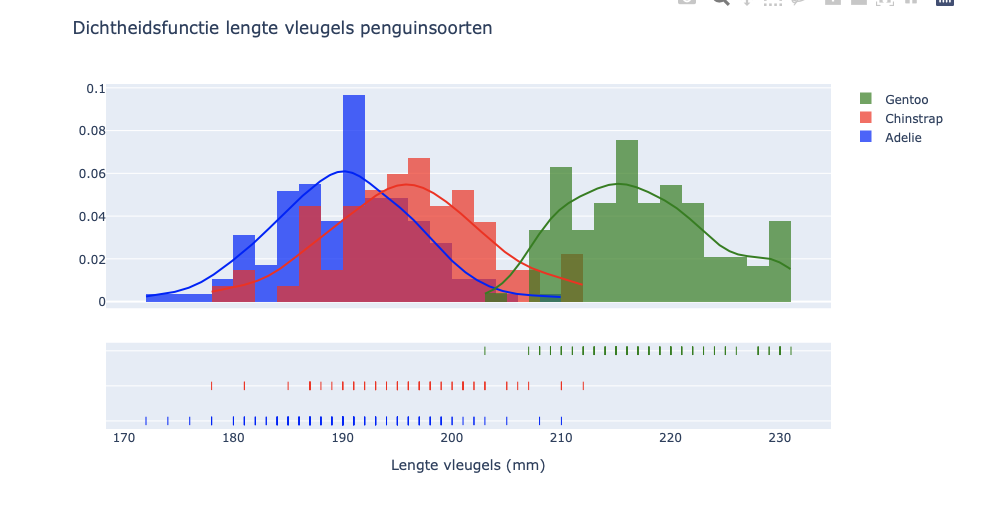

In [22]:
import plotly.figure_factory as ff
df = df.dropna()

Adelie = df[df['species']=='Adelie']['flipper_length_mm'].tolist()
Chinstrap = df[df['species']=='Chinstrap']['flipper_length_mm'].tolist()
Gentoo = df[df['species']=='Gentoo']['flipper_length_mm'].tolist()

hist_data = [Adelie, Chinstrap, Gentoo]
group_labels = ['Adelie', 'Chinstrap', 'Gentoo']
colors= ['#835AF1', '#7FA6EE', '#B8F7D4']

fig = ff.create_distplot(hist_data, group_labels,
                         colors=colors,
                         show_hist=True,
                         show_curve=False)

fig.update_layout(title='Dichtheidsfunctie lengte vleugels penguinsoorten',
                  xaxis_title='Lengte vleugels (mm)')

fig.show()


display.Image("Inleveropdracht2_Onderdeel9.png")

## Onderdeel 10

We willen de spreidingsdiagram ook maken met behulp van de `plotly.graph_objects` om een aantal opties toe te voegen.
* Maak een scatter matrix (splom). https://plotly.com/python/splom/
* Geef de verschillende soorten andere kleuren (als het kan, soortgelijke kleuren als in de voorgaande figuren, https://plotly.com/python/colorscales/)
* Geef de assen juiste namen en geef de figuur een passende titel

Zit in je in klas 1: 
* Zorg dat de markers doorzichtig zijn. Gebruik de waarde `0.3`.

Zit je in klas 2:
* Verberg de diagonale grafieken van de figuur.

Zit je in klas 3:
* Gebruik een hoogte en breedte van `800` voor deze figuur.

In [ ]:
import plotly.graph_objects as go

custom_colors = {
    'Adelie': '#1f77b4',
    'Chinstrap': "#ff0e0e",
    'Gentoo': '#2ca02c' 
}

df['color'] = df['species'].map(custom_colors)

fig = go.Figure(data=go.Splom(dimensions=[
            dict(label='gewicht', values=df['body_mass_g']),
            dict(label='flipper lengte', values=df['flipper_length_mm'])],
            marker=dict(
            color=df['color'],  # gebruik aangepaste kleuren
            size=6,
            opacity=0.3,
            line=dict(width=0.5, color='gray'))
            ))

### code
fig.update_layout(title="penguin gewicht tegenover flipper lengte")


fig.show()